In [1]:
%matplotlib inline
import pandas as pd

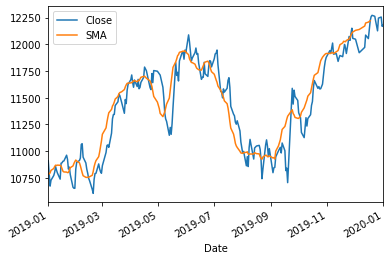

In [2]:
#10 day moving avrerage over nifty 50
data = pd.read_csv('NIFTY 50_Data.csv',index_col='Date',parse_dates=['Date'])
data['SMA'] = data['Close'].rolling(10).mean()
data.plot()

In [3]:
data['Close'].describe()

count      235.000000
mean     11418.592128
std        454.152078
min      10604.350000
25%      10985.125000
50%      11483.250000
75%      11817.225000
max      12271.800000
Name: Close, dtype: float64

In [4]:
data

,Close,SMA
Date,,
2020-01-01,12182.50,NaN
2019-12-31,12168.45,NaN
2019-12-30,12255.85,NaN
2019-12-27,12245.80,NaN
2019-12-26,12126.55,NaN
...,...,...
2019-01-07,10771.80,10837.250
2019-01-04,10727.35,10819.290
2019-01-03,10672.25,10795.995


In [5]:
data.shape

(235, 2)

In [6]:
#caluculate 50 and 100 day moving average
data['SMA50'] = data['Close'].rolling(50).mean()
data['SMA100'] = data['Close'].rolling(100).mean()

In [7]:
#set to 1 if SMA50 is above SMA100 else 0
import numpy as np
data['Position'] = np.where(data['SMA50'] > data['SMA100'],1,0)

In [8]:
data

,Close,SMA,SMA50,SMA100,Position
Date,,,,,
2020-01-01,12182.50,NaN,NaN,NaN,0
2019-12-31,12168.45,NaN,NaN,NaN,0
2019-12-30,12255.85,NaN,NaN,NaN,0
2019-12-27,12245.80,NaN,NaN,NaN,0
2019-12-26,12126.55,NaN,NaN,NaN,0
...,...,...,...,...,...
2019-01-07,10771.80,10837.250,10904.661,11259.9550,0
2019-01-04,10727.35,10819.290,10889.964,11246.3430,0
2019-01-03,10672.25,10795.995,10874.872,11233.8375,0


In [9]:
#Buy a day delayed
data['Position'] = data['Position'].shift()

In [10]:
#caluculate the daily percent return of strategy by taking the daily percent of return and multiply by the position 
data['StrategyPct'] = data['Close'].pct_change(1) * data['Position']

In [11]:
#calculate cummulative returns add 1 to all the percentage returns and use cumprod()
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

In [20]:
#Calculate cummulative returns for Buy and hold
data['BuyHold'] = (data['Close'].pct_change(1) + 1).cumprod()

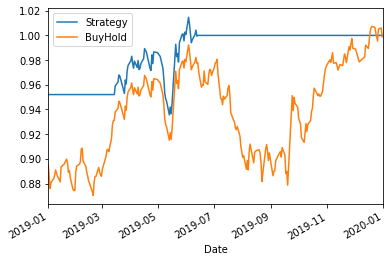

In [21]:
#plot the result
data[['Strategy','BuyHold']].plot()